# A Comparison of Classification Algorithms:



## Classification of celestial objects: stars, galaxies and quasars




def. 
1. Star: a luminous sphere of plasma held together by its own gravity
2. Galaxy: a large collection of stars, gas, and dust kept together by gravity
3. Quasar (quasi-stellar radio source) a star like point source with immense energy and much greater redshift.

quasar, star, galaxy: https://www.quora.com/What-is-the-difference-between-a-quasar-and-a-star
 


SLOAN DIGITAL SKY SURVEY (SDSS)

Description of the data: http://skyserver.sdss.org/dr7/en/help/docs/QS_UserGuide.asp

One of the fundamental issues in sdss survey is what can be a multicolor image data of an object through a telescope. Is it a star, a quasar, or a galaxy? 


1. Photometric Data: Various quantities measured from an object's image, such as its brightness or size
2. Spectroscopic Data: Various quantities measured from an object's spectrum, such as its spectral type or redshift.


Measurement of the magnitude and flux: http://www.sdss.org/dr12/algorithms/magnitudes/


observation in five wavelength filter bands http://www.astroml.org/examples/datasets/plot_sdss_filters.html




In [738]:
#Some of the libraries and packages we use

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from astroquery.sdss import SDSS 
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import datasets

### DATA MUNGING

In [739]:
 
# THE DATA IS FROM SDSS.
#TWO WAYS OF OBTAINING DATA

# 1. linking and loading the data via query (psf: point spread function, cModel: Composite Model, filters, 
#Petrosian magnitudes flux) were designed to help with the difficult task of determining a galaxy’s total
#light
#)
#query = """SELECT TOP 10000 
#            p.psfMag_u, p.psfMag_g, p.psfMag_r, p.psfMag_i, p.psfMag_z, 
#         p.psfFlux_u,p.psfFlux_g,p.psfFlux_r, p.psfFlux_i,p.psfFlux_z,
#        p.cModelFlux_u, p.cModelFlux_g, p.cModelFlux_r, p.cModelFlux_i, p.cModelFlux_z,
#      s.spectroFlux_u,  s.spectroFlux_g, s.spectroFlux_r, s.spectroFlux_i, s.spectroFlux_z, 
 #       p.petromag_u,p.petromag_g,p.petromag_r,p.petromag_i,p.petromag_z, s.class
  #          FROM PhotoObjAll AS p JOIN specObjAll s ON s.bestobjid = p.objid
  #         WHERE p.mode = 1 AND s.sciencePrimary = 1 AND p.clean = 1
  #          ORDER BY s.specobjid ASC
#        """
#dataraw = SDSS.query_sql(query).to_pandas()


#2.  DOWNLOADING THE DATABASE:

#feature_colsraw = ['psfMag_u', 'psfMag_g', 'psfMag_i', 'psfMag_r', 'psfMag_z',
 #                'psfFlux_u','psfFlux_g','psfFlux_r', 'psfFlux_i','psfFlux_z',
 #                 'cModelFlux_u','cModelFlux_g', 'cModelFlux_r', 'cModelFlux_i','cModelFlux_z',
 #                   'spectroFlux_u',  'spectroFlux_g', 'spectroFlux_r', 'spectroFlux_i', 'spectroFlux_z',
 #                'petromag_u','petromag_g','petromag_r','petromag_i','petromag_z','clas']

dataraw = pd.read_csv("/Users/hos/GA-PROJECT/CELOBJ5000.csv", index_col=None)
dataraw.head(3)   # print the first 5 rows
len(dataraw)
dataraw.index             # "the index" (aka "the labels")
dataraw.columns           # column names (which is "an index")
dataraw.dtypes            # data types of each column
#dataraw.shape             # number of rows and columns
#dataraw.values  # underlying numpy array
#dataraw.info()  
#len(dataraw)
#dataraw.describe()
#dataraw.corr()



psfMag_u         float64
psfMag_g         float64
psfMag_r         float64
psfMag_i         float64
psfMag_z         float64
psfFlux_u        float64
psfFlux_g        float64
psfFlux_r        float64
psfFlux_i        float64
psfFlux_z        float64
cModelFlux_u     float64
cModelFlux_g     float64
cModelFlux_r     float64
cModelFlux_i     float64
cModelFlux_z     float64
spectroFlux_u    float64
spectroFlux_g    float64
spectroFlux_r    float64
spectroFlux_i    float64
spectroFlux_z    float64
petromag_u       float64
petromag_g       float64
petromag_r       float64
petromag_i       float64
petromag_z       float64
class             object
dtype: object

In [740]:
#since one of the features named "class" and this name makes problem later when we do modeling,
#from now we rename the "class" as "clas"
dataraw.rename(columns={'class':'clas'}, inplace=True)
dataraw.head(3)


,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,psfFlux_u,psfFlux_g,psfFlux_r,psfFlux_i,psfFlux_z,...,spectroFlux_g,spectroFlux_r,spectroFlux_i,spectroFlux_z,petromag_u,petromag_g,petromag_r,petromag_i,petromag_z,clas
0,19.08621,17.41779,16.59581,16.03497,15.68077,23.200550,107.866000,229.97300,385.49080,534.18410,...,140.295000,327.95220,499.94520,651.97530,17.12867,15.61450,14.84587,14.44303,14.13193,GALAXY
1,22.34321,20.31663,18.93372,18.37257,17.98846,1.138389,7.469364,26.69960,44.76786,63.76141,...,9.335421,34.65110,57.45160,74.03194,20.79233,19.23255,17.79019,17.21832,16.83603,GALAXY
2,20.02440,19.60159,19.49290,19.37188,19.29829,9.775770,14.432720,15.95196,17.83215,19.05594,...,13.408740,15.18042,17.93766,17.15082,19.93402,19.55049,19.41699,19.24576,19.21395,QSO


In [741]:
#we need to delete the rows containa very large negative value for the magnitude

dataraw[dataraw.psfMag_z < 0]

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,psfFlux_u,psfFlux_g,psfFlux_r,psfFlux_i,psfFlux_z,...,spectroFlux_g,spectroFlux_r,spectroFlux_i,spectroFlux_z,petromag_u,petromag_g,petromag_r,petromag_i,petromag_z,clas
2092,20.55437,-9999.0,18.74891,-9999.0,-9999.0,5.998143,0.0,31.65409,0.0,0.0,...,21.43814,43.74011,69.77608,85.92978,20.16712,-9999.0,17.98934,-9999.0,-9999.0,GALAXY


In [742]:
dataraw.drop(dataraw.index[2092], inplace=True)

In [743]:
dataraw[dataraw.psfMag_z < 0]

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,psfFlux_u,psfFlux_g,psfFlux_r,psfFlux_i,psfFlux_z,...,spectroFlux_g,spectroFlux_r,spectroFlux_i,spectroFlux_z,petromag_u,petromag_g,petromag_r,petromag_i,petromag_z,clas


In [744]:
dataraw.describe()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,psfFlux_u,psfFlux_g,psfFlux_r,psfFlux_i,psfFlux_z,...,spectroFlux_u,spectroFlux_g,spectroFlux_r,spectroFlux_i,spectroFlux_z,petromag_u,petromag_g,petromag_r,petromag_i,petromag_z
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,...,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,21.109642,19.553884,18.706863,18.302932,17.968629,8.644122,27.567016,51.096985,70.718944,94.406862,...,14.685387,32.346055,65.777623,94.941052,121.473653,19.903003,18.337406,17.461521,17.064176,16.824468
std,1.389727,1.130869,0.927196,0.898957,0.898980,26.073155,68.468714,98.814546,116.673736,135.604463,...,32.829280,55.071314,84.662111,107.023641,131.419386,1.629461,1.276424,1.047501,1.047876,1.114866
min,15.269830,14.054520,13.729960,13.569800,13.496020,-0.533082,-0.053864,0.917660,-0.093826,-0.935050,...,-2.199290,-0.369642,-0.234229,-1.563091,-7.924775,14.924670,13.617160,12.786200,12.376030,12.136190
25%,20.393155,18.967935,18.194650,17.782415,17.415575,2.094104,9.428316,19.312070,27.498860,36.067885,...,4.677986,13.038820,28.533010,41.195425,51.569060,19.022745,17.660905,16.910315,16.515055,16.246750
50%,21.106530,19.509560,18.722240,18.312450,17.952990,3.603578,15.709450,32.441180,47.316760,65.879640,...,7.871698,20.425550,45.747120,68.973160,89.974370,19.677060,18.254070,17.465270,17.069270,16.800680
75%,21.692685,20.063815,19.285385,18.901665,18.606740,6.959229,25.871425,52.739725,77.096100,108.081400,...,13.764420,33.221425,72.721520,108.312250,140.914800,20.394085,18.779420,17.839030,17.438125,17.241300
max,26.154490,25.434630,22.575190,24.641680,23.473900,779.949600,2388.866000,3221.178000,3733.180000,3995.706000,...,836.803600,1333.539000,1703.591000,2013.491000,2156.830000,31.658520,29.199510,22.947200,26.748640,29.732990


In [745]:
#Introducing new features:the magnitude differences between different bands, aka colors:

dataraw["ug"] = dataraw.psfMag_u - dataraw.psfMag_g
dataraw["gr"] = dataraw.psfMag_g - dataraw.psfMag_r
dataraw["ri"] = dataraw.psfMag_r - dataraw.psfMag_i
dataraw["iz"] = dataraw.psfMag_i - dataraw.psfMag_z
dataraw.head()

dataraw.describe()
dataraw.corr()

import pandas_profiling
pandas_profiling.ProfileReport(dataraw)

Number of variables,31
Number of observations,4999
Total Missing (%),0.0%
Total size in memory,1.2 MiB
Average record size in memory,248.0 B
Numeric,12
Categorical,1
Date,0
Text (Unique),0
Rejected,18
Correlation,0.90531


In [755]:
# for logistic regression we consider those features that are not hightly correlated. We take the recommendation from
#pandas profiling and remove those rejected features.


#feature_cols = ['psfMag_u', 'psfMag_g', 'psfMag_i', 'psfMag_r', 'psfMag_z',
#                 'psfFlux_u','psfFlux_g','psfFlux_r', 'psfFlux_i','psfFlux_z',
#                  'cModelFlux_u','cModelFlux_g', 'cModelFlux_r', 'cModelFlux_i','cModelFlux_z',
 #                   'spectroFlux_u',  'spectroFlux_g', 'spectroFlux_r', 'spectroFlux_i', 'spectroFlux_z',
 #                'petromag_u','petromag_g','petromag_r','petromag_i','petromag_z','clas', 'ug','gr','ri','iz']


datarawreduc = dataraw[['psfMag_u','psfMag_g','psfFlux_u','cModelFlux_u','spectroFlux_u','petromag_u',
                    'petromag_g', 'gr','iz', 'ri','ug','clas']]

#print(datarawreduc)
#data = pd.read_csv("/Users/hos/GA-PROJECT/CELOBJnew2.csv", names=feature_cols, index_col=None)



type(datarawreduc)             # DataFrame
datarawreduc.head(5)            # print the first 5 rows


datarawreduc.corr()

import pandas_profiling
pandas_profiling.ProfileReport(datarawreduc)

Number of variables,13
Number of observations,4999
Total Missing (%),0.0%
Total size in memory,507.8 KiB
Average record size in memory,104.0 B
Numeric,12
Categorical,1
Date,0
Text (Unique),0
Rejected,0
Distinct count,4997


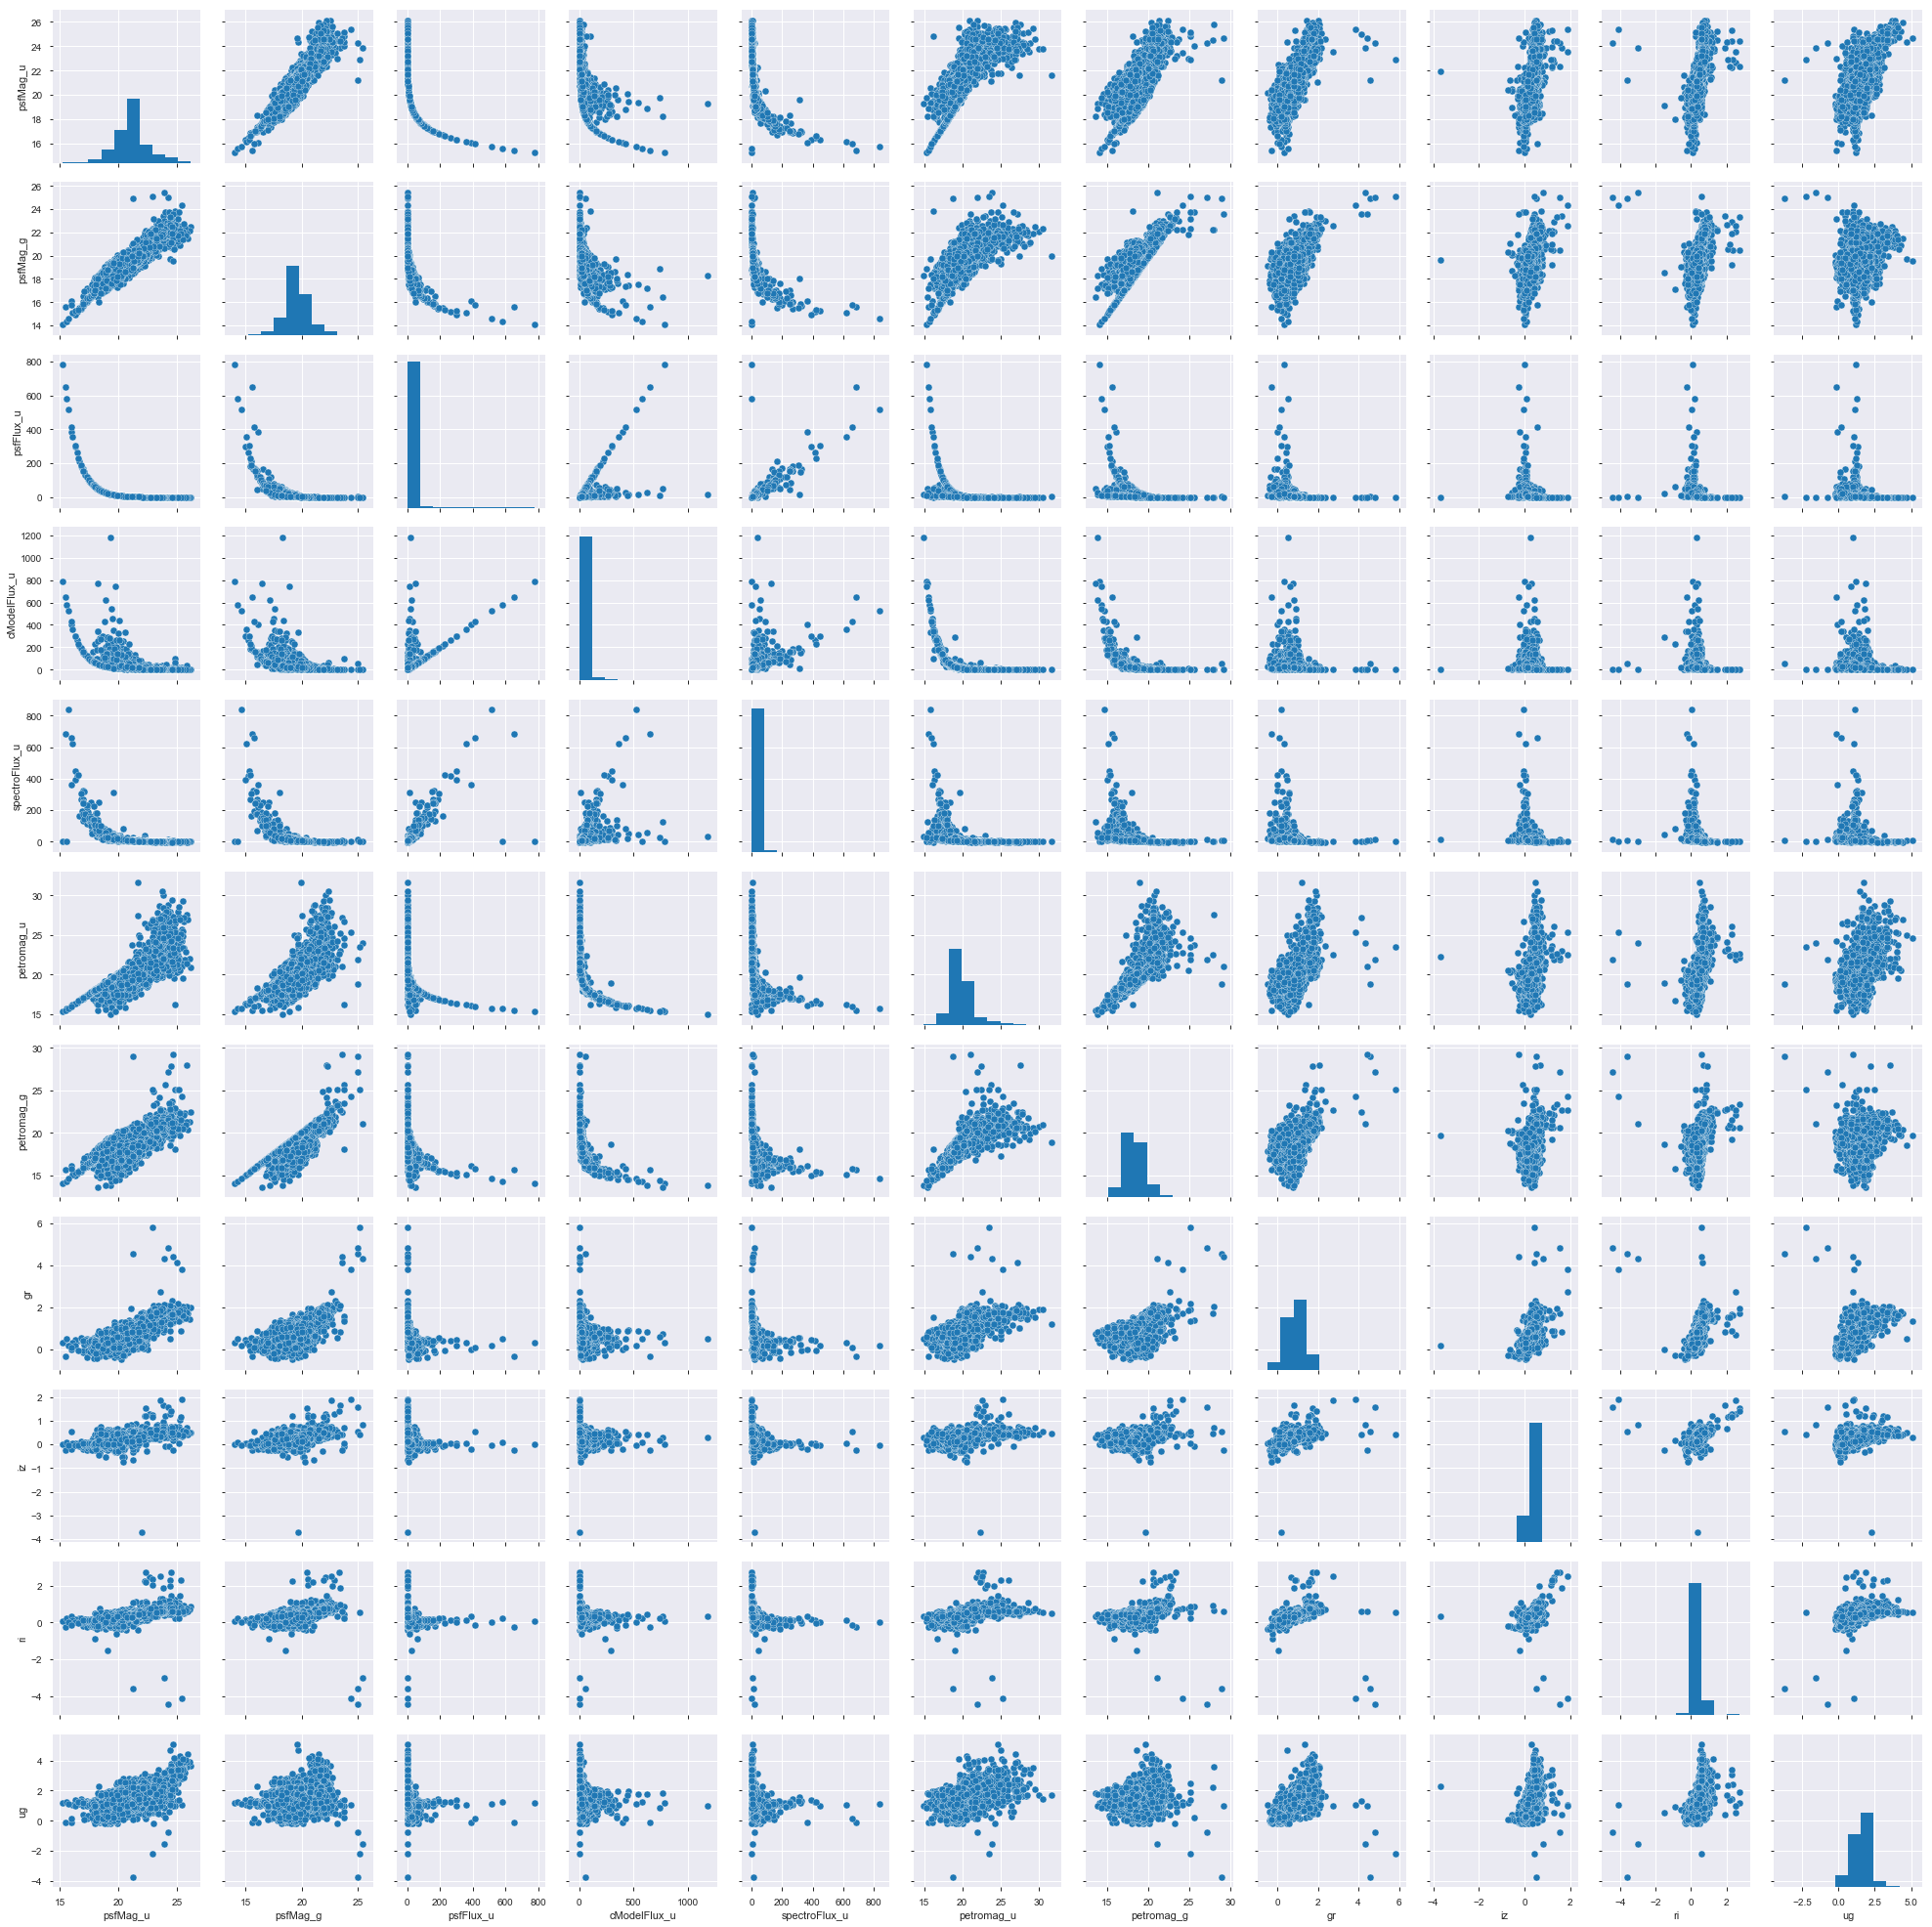

In [747]:
# Seaborn
%matplotlib inline
sns.pairplot(datarawreduc)

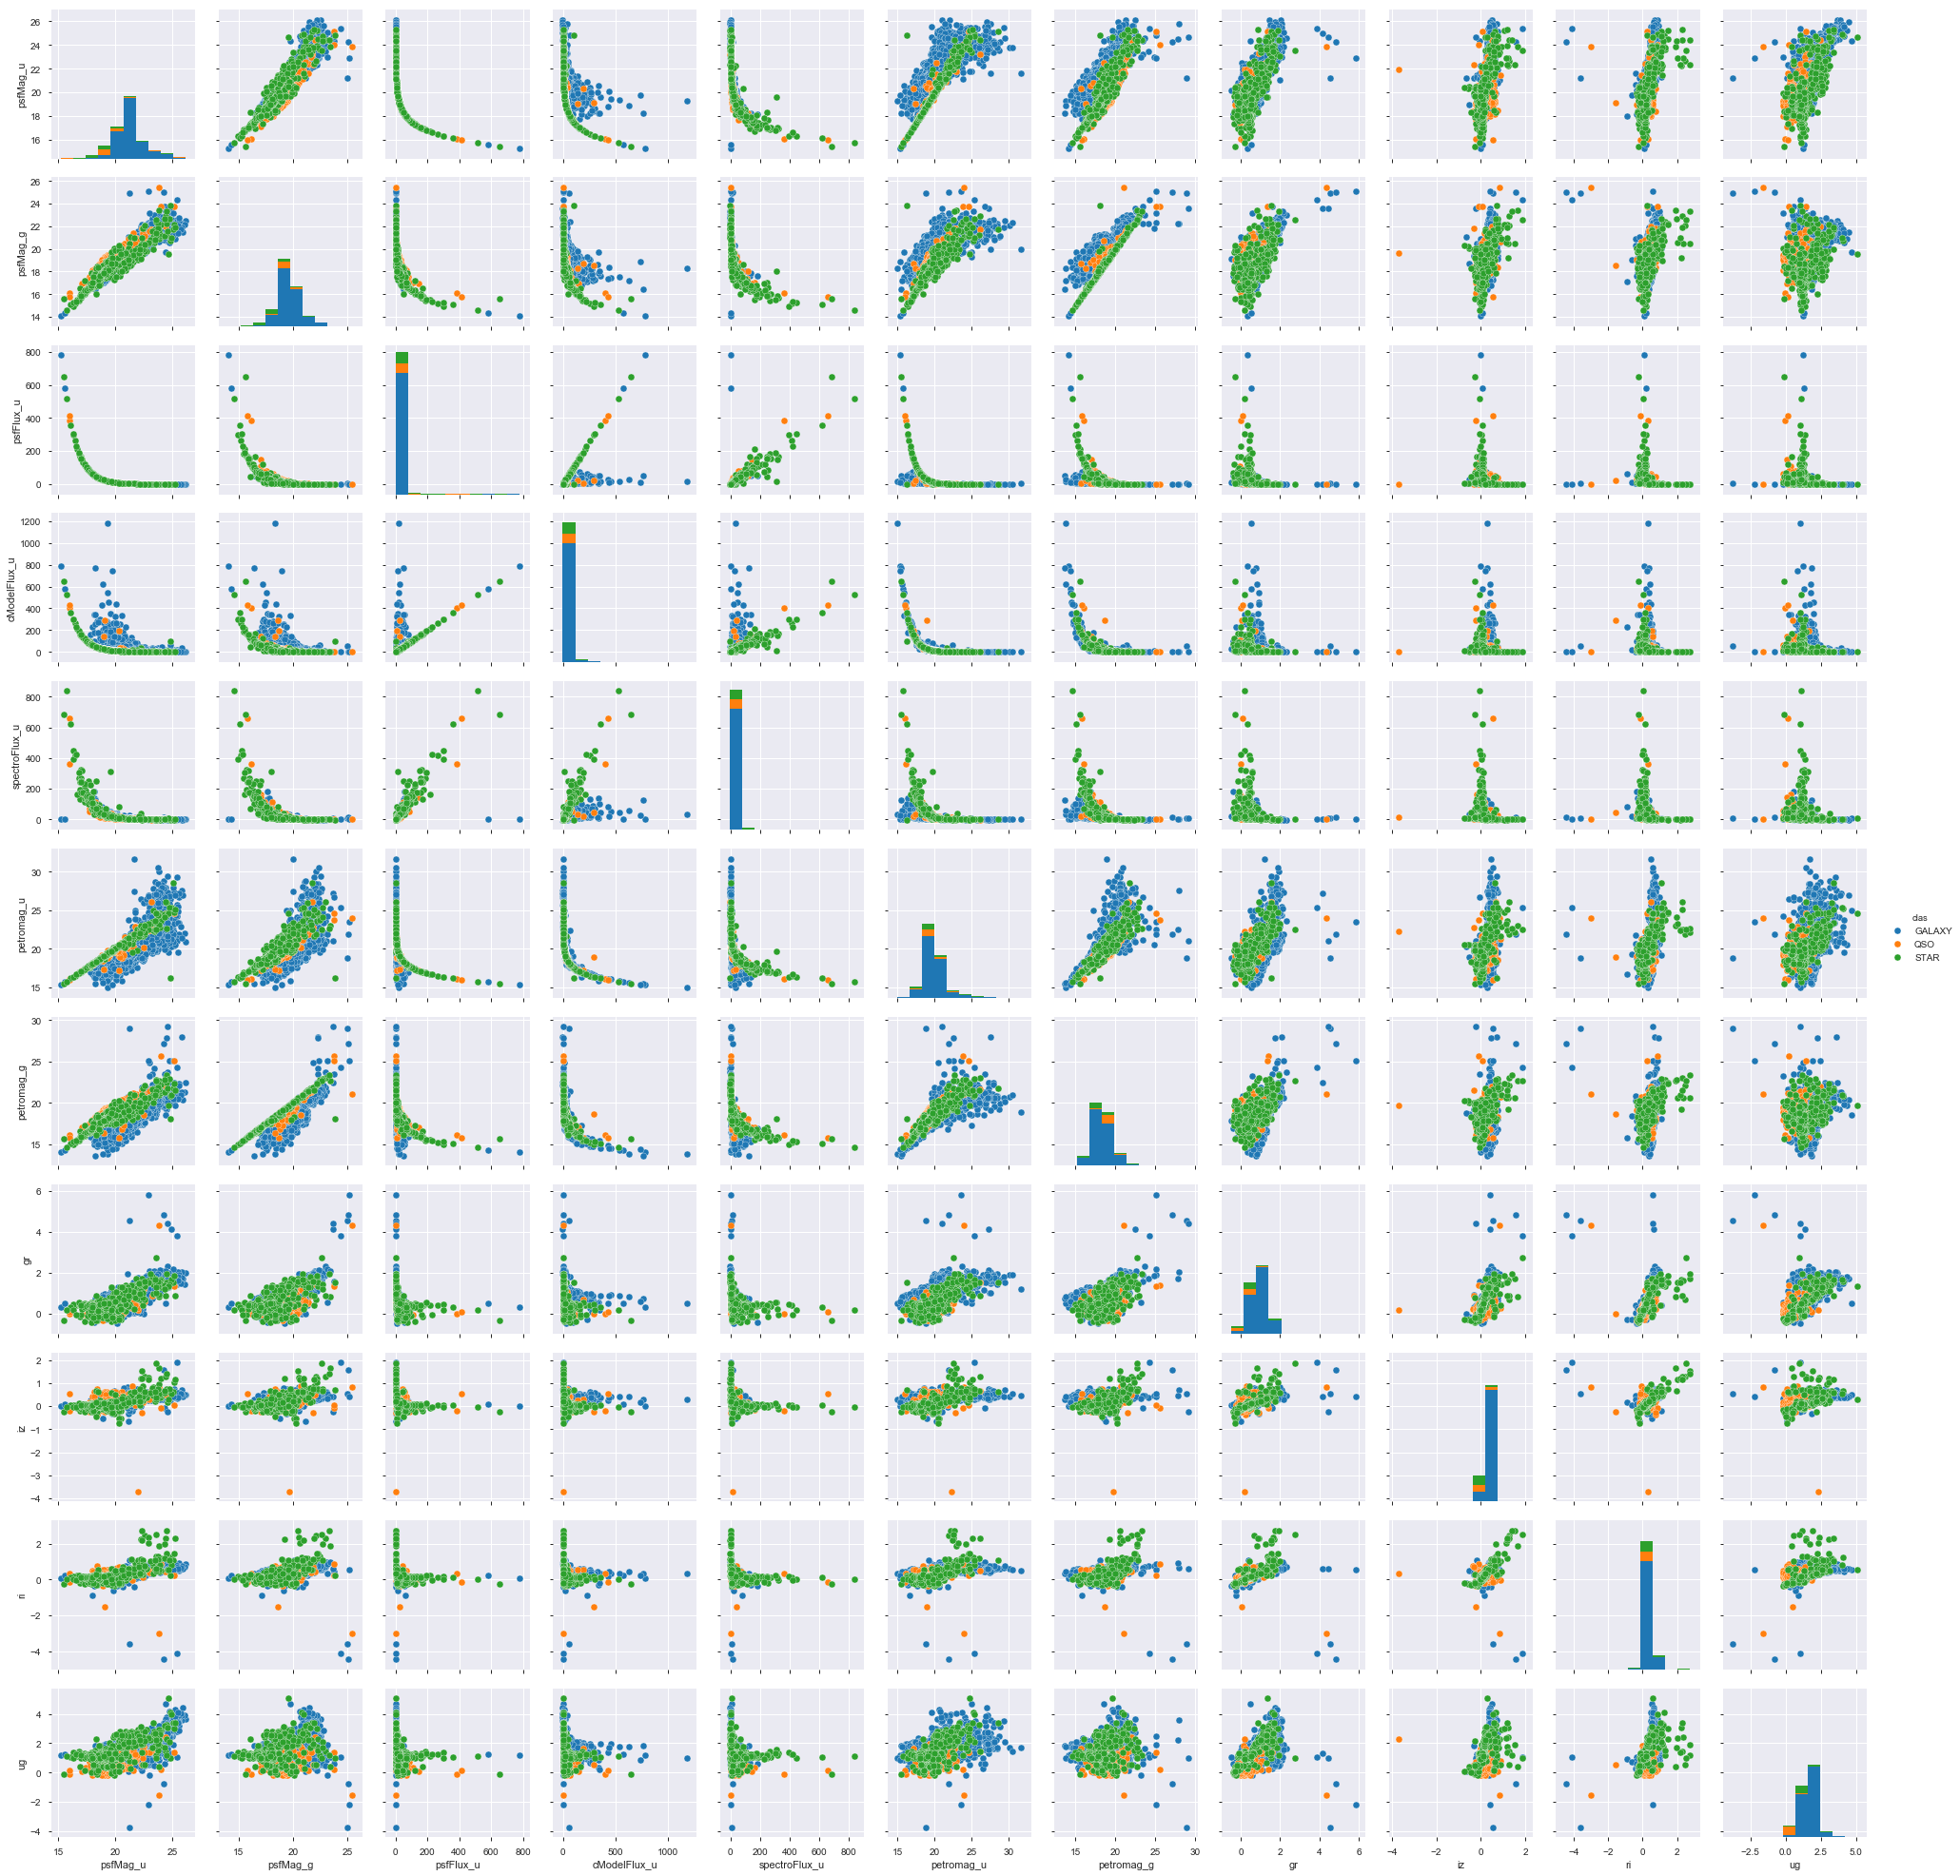

In [748]:
# Seaborn can also color the data by category:
%matplotlib inline
sns.pairplot(datarawreduc, hue="clas")

(array([  2.27598810e-04,   2.27598810e-04,   2.27598810e-04,
          2.27598810e-04,   9.30879132e-02,   4.10588253e-01,
          5.75142193e-01,   4.91613429e-02,   7.96595835e-03,
          9.10395240e-04]),
 array([-3.71986 , -2.840945, -1.96203 , -1.083115, -0.2042  ,  0.674715,
         1.55363 ,  2.432545,  3.31146 ,  4.190375,  5.06929 ]),
 <a list of 1 Patch objects>)

/Users/hos/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


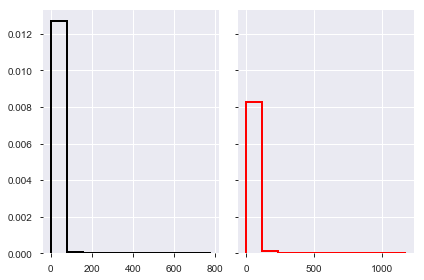

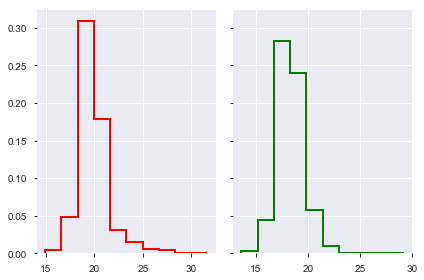

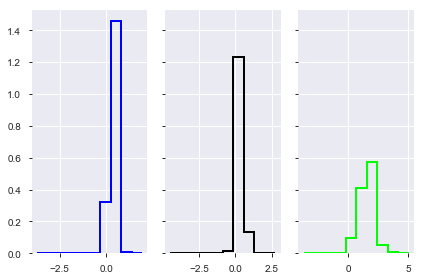

In [754]:
#Histograms
#distribution of the normalised values of each features

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(datarawreduc["psfFlux_u"],histtype='step',stacked=True , linewidth=2, color='black', fill=False,  normed=1)
axs[1].hist(datarawreduc["cModelFlux_u"],histtype='step',stacked=True, linewidth=2, color='red', fill=False,  normed=1)

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
axs[0].hist(datarawreduc["petromag_u"],histtype='step',stacked=True, linewidth=2, color='red', fill=False,  normed=1)
axs[1].hist(datarawreduc["petromag_g"],histtype='step',stacked=True, linewidth=2, color='green', fill=False, normed=1)




fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True)
axs[0].hist(datarawreduc["iz"],histtype='step',stacked=True, linewidth=2, color='blue', fill=False,  normed=1)
axs[1].hist(datarawreduc["ri"],histtype='step',stacked=True, linewidth=2, color='black', fill=False,  normed=1)
axs[2].hist(datarawreduc["ug"],histtype='step',stacked=True, linewidth=2, color='lime', fill=False,  normed=1)






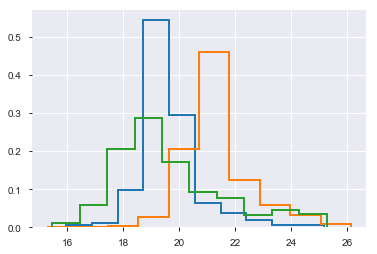

In [510]:
datarawreduc1 = datarawreduc.replace({'clas': {'STAR': '2', 'GALAXY': '1', 'QSO': '0'}})
datarawreduc1['clas'] = (datarawreduc1['clas']).astype(int)
#print(datarawreduc)

group = datarawreduc1.groupby('clas').psfMag_u.hist(stacked=True, histtype='step', linewidth=2, fill=False, normed=1)


#pd.DataFrame({'QSO':   datarawreduc1.groupby('clas').get_group(0).psfMag_u,
 #             'GALAXY': datarawreduc1.groupby('clas').get_group(1).psfMag_u,
  #            'STAR': datarawreduc1.groupby('clas').get_group(2).psfMag_u,}).plot.hist(stacked=True, histtype='step',linewidth=2, fill=False, normed = 1)


### Practice some models

### 1. Logistic Regression

In [513]:
#Split the data


# In logistic regression, we use the datarawreduc that contain not highly correlated features


datarawreduc1 = datarawreduc.replace({'clas': {'STAR': '2', 'GALAXY': '1', 'QSO': '0'}})
datarawreduc1['clas'] = (datarawreduc1['clas']).astype(int)

y = datarawreduc1['clas']
del datarawreduc1['clas']


#X=datarawreduc[['psfMag_u', 'psfMag_g', 'psfMag_i', 'psfMag_r', 'psfMag_z',
 #               'psfFlux_u','psfFlux_g','psfFlux_r', 'psfFlux_i','psfFlux_z',
 #                 'cModelFlux_u','cModelFlux_g', 'cModelFlux_r', 'cModelFlux_i','cModelFlux_z',
 #                   'spectroFlux_u',  'spectroFlux_g', 'spectroFlux_r', 'spectroFlux_i', 'spectroFlux_z',
  #              'petromag_u','petromag_g','petromag_r','petromag_i','petromag_z']]


X=datarawreduc1[['psfMag_u','psfMag_g','psfFlux_u','cModelFlux_u','spectroFlux_u','petromag_u',
                   'petromag_g', 'gr','iz', 'ri','ug']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
#print(X_train)
print(y.shape)


(4999,)


In [514]:
#  fit a logistic regression model and examine the coefficients
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.fit(X_train, y_train))
print(set(zip(X, logreg.coef_[0])))
#for col in zip(X_train.columns, logreg.coef_[0]):
    #print(col)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
{('psfMag_g', 0.28525703688142023), ('psfFlux_u', -0.0015383406987991895), ('petromag_u', 0.5045315261661536), ('ug', -2.1144855413764843), ('petromag_g', 1.1360067681411457), ('iz', 0.54977330022317161), ('cModelFlux_u', 0.0024676405475859055), ('gr', -1.1933837159742482), ('ri', 1.1495897706107865), ('spectroFlux_u', -0.0050972948574881834), ('psfMag_u', -1.8292285044974559)}


In [515]:
# make predictions on testing set and calculate accuracy
y_pred = logreg.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.97


In [516]:
# Confusion Matrix
from sklearn import metrics
prds = logreg.predict(X)  #or prds = logreg.predict(X_test) the same result
print(metrics.confusion_matrix(y_test, y_pred))

[[  82   12    5]
 [   4 1265    4]
 [  13    7  108]]


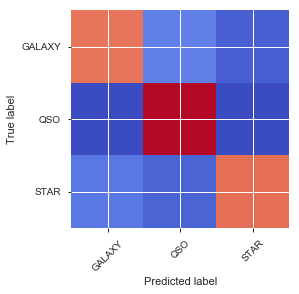

In [517]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cmNorm = cm.astype(float)/cm.sum(axis = 1)[:,np.newaxis]
plt.imshow(cmNorm, interpolation = 'Nearest', cmap = 'coolwarm', vmin = 0, vmax = 1)
#grid(True)
#colorbar()
tick_names = ["GALAXY", "QSO","STAR"]
tick_marks = np.arange(len(tick_names))
plt.xticks(tick_marks, tick_names, rotation=45)
plt.yticks(tick_marks, tick_names)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [518]:
#importance
func  = logreg.fit(X_train, y_train)
reduced_train = func.transform(X_train)
print (reduced_train)
print(X_train)


[[ 23.54398  21.48648  20.08288   1.88574   0.61614   2.0575 ]
 [ 21.14536  20.34747  18.32051   0.13772   0.19382   0.79789]
 [ 20.61226  18.84981  17.28494   1.03243   0.45157   1.76245]
 ..., 
 [ 19.85206  18.71681  16.95457   0.43538   0.2497    1.13525]
 [ 20.89543  19.13986  18.09531   0.84086   0.40271   1.75557]
 [ 20.53592  18.63699  17.93725   0.82976   0.37245   1.89893]]
      psfMag_u  psfMag_g  psfFlux_u  cModelFlux_u  spectroFlux_u  petromag_u  \
1390  23.54398  21.48648   0.331034      6.767226       2.471294    21.19889   
2485  21.14536  20.34747   3.476577     19.794320       6.827386    19.28738   
467   20.61226  18.84981   5.686339     31.314410      11.583820    18.87079   
4448  19.04255  17.15843  24.152690    142.823000      62.386100    17.25419   
276   24.15413  22.61276   0.128015      2.055277       0.004059    24.30433   
1046  20.02045  18.00469   9.811444     32.250280      21.947810    18.96928   
4535  21.77691  19.70281   1.936358      5.258187     

/Users/hos/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


### So the most important features are psfMag_u, psfMag_g , petromag_g , gr, ri, ug 

#### 1.1 cross validation logistic regression


In [519]:
#  fit cross validation logistic regression model with no reqularization

from sklearn.linear_model import LogisticRegressionCV
logregCV = LogisticRegressionCV(Cs=[1, 10])#regularization is weak for large Cs
logregCV.fit(X_train, y_train)


LogisticRegressionCV(Cs=[1, 10], class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [520]:
# make predictions on testing set and calculate accuracy
y_pred_CV = logregCV.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_CV))

0.969333333333


In [521]:
# Confusion Matrix
from sklearn import metrics
prds = logreg.predict(X)
print(metrics.confusion_matrix(y_test, y_pred_CV))
#X1=datarawreduc1[['psfMag_u','psfMag_g']]# we only take the first two features.
#print(X1[['psfMag_u']].min())


[[  83   12    4]
 [   4 1264    5]
 [  13    8  107]]


#### 1.2 Decision boundary for logistic regression

(4999,)


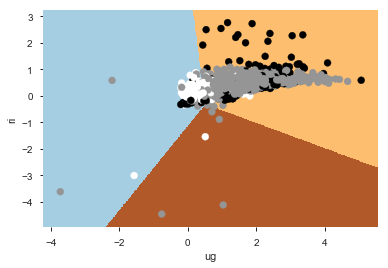

In [522]:
### plot for decision boundary

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# we can use the important features psfMag_u, psfMag_g , petromag_g , gr, ri, ug 

DB=datarawreduc1[['ug','ri']]# we only take the first two features.



model = linear_model.LogisticRegression(C=10000) # C = 1/alpha



model.fit(DB, y)
print(y.shape)



#### Plot the decision boundary. For that, we will assign a color to each
#### point in the mesh [x_min, m_max]:[y_min, y_max]
x_min, x_max = DB[['ug']].min() - .5, DB[['ug']].max() + .5
y_min, y_max = DB[['ri']].min() - .5, DB[['ri']].max() + .5



h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

#### Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)




#plt.scatter(X1[['spectroFlux_upsfMag_u']], X1[['psfMag_g']], c =y)#color="#3333e5")
plt.scatter(DB[['ug']], DB[['ri']], c =y)#color="#3333e5")


plt.xlabel('ug')
plt.ylabel('ri')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
#print(y.shape)

#### No good decision boundary have been found for the features that nicely seperate the classes

#### The Lasso optimizes a least-square problem with a L1 penalty. By definition you can't optimize a logistic function with the Lasso.

### 2. Support Vector Machine (SVM)

In [524]:
#OneVsRest Classifier
print(__doc__)

import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp



# Binarize the output
ybinary = label_binarize(y, classes=[0, 1, 2])
n_classes = ybinary.shape[1]

print(y.shape)

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, ybinary, test_size=.3,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
#print(y_score)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])



from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

from sklearn.model_selection import cross_val_score

# compare AUC using cross-validation
print("AUC for logistic regression: 
{}".format(cross_val_score(logreg, datarawreduc1, y, cv=10, scoring='roc_auc').mean()))
print("
AUC for decision tree: 
{}".format(cross_val_score(ctree, datarawreduc1, y, cv=10, scoring='roc_auc').mean()))

# so far logistic regression is winning..


(4999,)


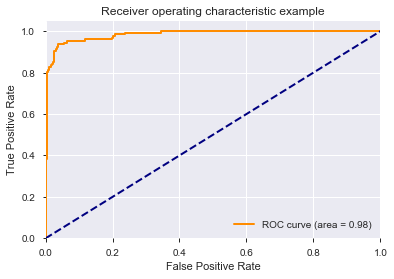

In [525]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

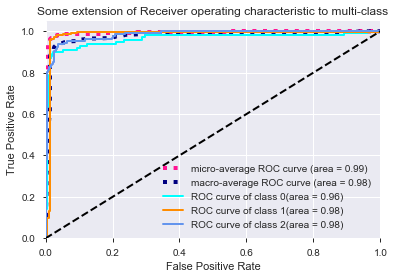

(4999,)


In [527]:
#### Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0}(area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
print(y.shape)

In [528]:
# make predictions on testing set and calculate accuracy
y_predSVM = classifier.predict(X_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_predSVM))

0.954


#### Create multi-label data, fit, and predict

#### The average precision score in multi-label settings

In [530]:


# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))
print(y.shape)

Average precision score, micro-averaged over all classes: 0.98
(4999,)


#### Plot the micro-averaged Precision-Recall curve

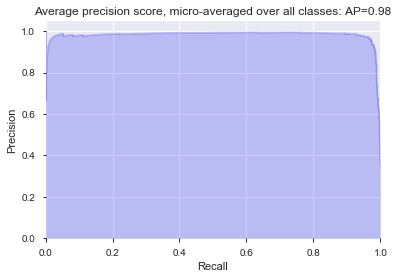

In [531]:
plt.figure()
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))

#### Plot Precision-Recall curve for each class and iso-f1 curves

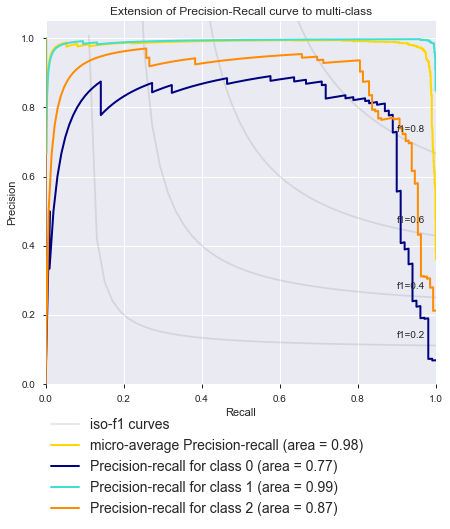

(4999,)


In [534]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y1 = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y1 >= 0], y1[y1 >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y1[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()
print(y.shape)

### 3. KMeans 

K-means might not work: 
1. when dimensions have different scales
2) for non-spherical shapes
3) for clusters of different sizes


#### Determining the # of clusters

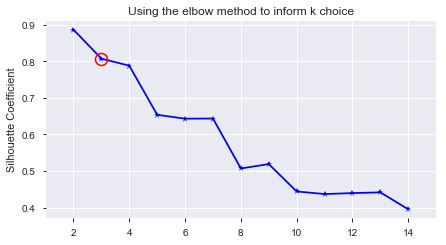

In [535]:
# Create a bunch of different models
k_rng = range(1,15)
est = [KMeans(n_clusters = k).fit(X_train) for k in k_rng]

#================================
# Option 1: Silhouette Coefficient
# Generally want SC to be closer to 1, while also minimizing k

from sklearn import metrics
silhouette_scores = [metrics.silhouette_score(X_train, e.labels_, metric='euclidean') for e in est[1:]]

silhouette_scores

# Plot the results
plt.figure(figsize=(7, 8))
plt.subplot(211)
plt.title('Using the elbow method to inform k choice')
plt.plot(k_rng[1:], silhouette_scores, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.ylabel('Silhouette Coefficient')
plt.plot(3,silhouette_scores[1], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


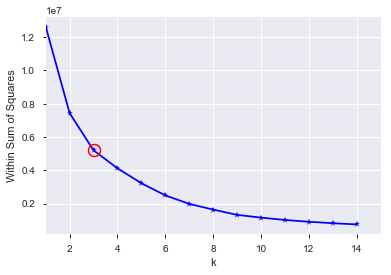

In [536]:
# Option 2: Within Sum of Squares (a.k.a., inertia)
# Generally want to minimize WSS, while also minimizing k

within_sum_squares = [e.inertia_ for e in est]

within_sum_squares


# Plot the results
plt.plot(k_rng, within_sum_squares, 'b*-')
plt.xlim([1,15])
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Within Sum of Squares')
plt.plot(3,within_sum_squares[2], 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

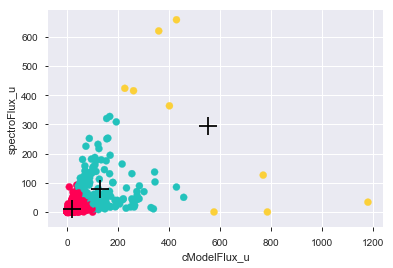

In [537]:

from sklearn.cluster import KMeans

np.random.seed(0)

est = KMeans(n_clusters=3, init='random')
est.fit(X_train,y_train)


y_kmeans = est.predict(X_train)

centers = est.cluster_centers_

#psfMag_u','psfMag_g','psfFlux_u','cModelFlux_u','spectroFlux_u','petromag_u',
#                   'petromag_g', 'gr','iz', 'ri','ug']]

colors = np.array(['#FF0054','#FBD039','#23C2BC'])
plt.figure()


plt.scatter(X_train["cModelFlux_u"], X_train["spectroFlux_u"], c=colors[y_kmeans], s=50)

plt.scatter(centers[:,3], centers[: ,4], c='k', linewidths=3, marker='+', s=300)


plt.xlabel("cModelFlux_u")
plt.ylabel("spectroFlux_u")





In [538]:
# calculate accuracy

#In terms of evaluating accuracy. You should remember that k-means is not a classification tool, 
#thus analyzing accuracy is not a very good idea
#y_kmeans = est.predict(X_train)
from sklearn import metrics
#print(metrics.accuracy_score(y_test, y_kmeans))

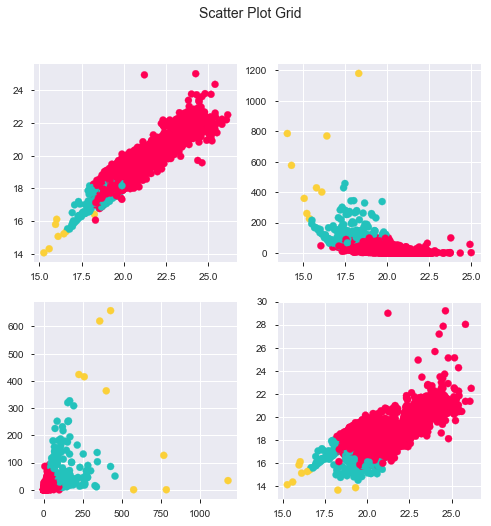

In [539]:
# Note: The command for generating a subplot is
#
#     subplot(nrows, ncols, plot_number)
#
# where nrows is the total number of rows, ncols is the total number of columns, 
# and plot_number is the index of the plot (from left to right, top to bottom)
# when all are less than 10, commas can be omitted (cute!)

plt.figure(figsize=(8, 8))
plt.suptitle('Scatter Plot Grid',  fontsize=14)
# Upper Left
plt.subplot(221)
plt.scatter(X_train["psfMag_u"], X_train["psfMag_g"], c = colors[y_kmeans])


# Upper Right
plt.subplot(222)
plt.scatter(X_train["psfMag_g"], X_train["cModelFlux_u"], c=colors[y_kmeans], s=50)


# Lower Left
plt.subplot(223)
plt.scatter(X_train["cModelFlux_u"], X_train["spectroFlux_u"], c=colors[y_kmeans], s=50)
#plt.ylabel()
#plt.xlabel()

# Lower Right
plt.subplot(224)
plt.scatter(X_train["psfMag_u"], X_train["petromag_g"], c=colors[y_kmeans], s=50)
#plt.xlabel()

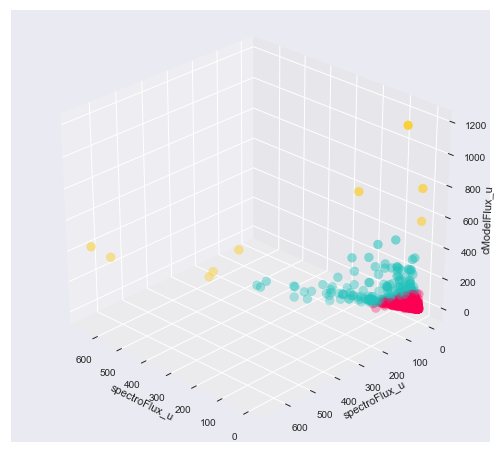

In [540]:
from mpl_toolkits.mplot3d import Axes3D
plt.suptitle('3d plot', fontsize=15)

ax = Axes3D(plt.figure(figsize=(7, 6)), rect=[.01, 0, 0.95, 1], elev=30, azim=134)
ax.scatter(X_train["spectroFlux_u"], X_train["spectroFlux_u"], X_train["cModelFlux_u"], c = colors[y_kmeans], s=80)
ax.set_xlabel("spectroFlux_u")
ax.set_ylabel("spectroFlux_u")
ax.set_zlabel("cModelFlux_u")

### 4. KNN Classifier

In [541]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=8)# increasing the n_neighbors number increases the accuracy score

#Xknn=datarawreduc1[['gr','ug']]

neigh.fit(X_train, y_train)

y_predknn = neigh.predict(X_test)

from sklearn import metrics
print(metrics.accuracy_score(y_test, y_predknn))


0.930666666667




from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

from sklearn.model_selection import cross_val_score

# compare AUC using cross-validation
print("AUC for logistic regression: 
{}".format(cross_val_score(logreg, datarawreduc1, y, cv=10, scoring='roc_auc').mean()))
print("
AUC for decision tree: 
{}".format(cross_val_score(ctree, datarawreduc1, y, cv=10, scoring='roc_auc').mean()))

# so far logistic regression is winning..


(4999,)


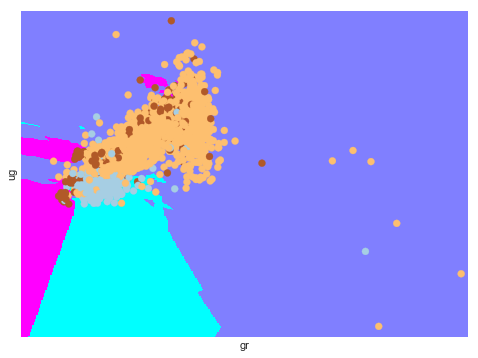

In [542]:
print (__doc__)

import numpy as np
import pylab as pl
from sklearn import neighbors, datasets

h = .02 # step size in the mesh

knn=neighbors.KNeighborsClassifier()
Xknn=datarawreduc1[['gr','ug']]# we only take the first two features.
print(y.shape)
# we create an instance of Neighbours Classifier and fit the data.
knn.fit(Xknn, y)



# Plot the decision boundary. For that, we will asign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].

x_min, x_max = Xknn[['gr']].min() - .5, Xknn[['gr']].max() + .1
y_min, y_max = Xknn[['ug']].min() - .3, Xknn[['ug']].max() + .3


#x_min, x_max = X1[['spectroFlux_u']].min() - .5, X1[['spectroFlux_u']].max() + .1
#y_min, y_max = X1[['petromag_g']].min() - .3, X1[['petromag_g']].max() + .3

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
pl.figure(1, figsize=(8, 6))
pl.set_cmap(pl.cm.Paired)
#pl.pcolormesh(xx, yy, Z)
pl.pcolormesh(xx, yy, Z, cmap='cool')

# Plot also the training points
pl.scatter(Xknn[['gr']], Xknn[['ug']],c=y )
pl.xlabel('gr')
pl.ylabel('ug')

pl.xlim(xx.min(), xx.max())
pl.ylim(yy.min(), yy.max())
pl.xticks(())
pl.yticks(())

pl.show()
    

In [543]:

# make predictions on testing set and calculate accuracy
y_predknn = knn.predict(Xknn)
from sklearn import metrics
print(metrics.accuracy_score(y, y_predknn))

#In terms of evaluating accuracy. You should remember that k-means is not a classification tool, 
#thus analyzing accuracy is not a very good idea
#from sklearn import metrics
#print(metrics.accuracy_score(y_test, y_kmeans))

0.926185237047


#### 5. Ensemble Classifications

#### 5.1 Random Forest Algorithm

In [544]:
#X=data.drop("clas",1)
#print(X)
#y=data["clas"]

#y=y.astype('int')
#print(y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

rfclf=RandomForestClassifier(n_estimators=100)
rfclf.fit(X_train, y_train)
print(rfclf.score(X_test,y_test))

0.973333333333


In [817]:
# import class, instantiate estimator, fit with all data

rfclf = RandomForestClassifier(n_estimators=100, max_features='auto', random_state=1)#, oob_score=False
rfclf.fit(X_train, y_train)
print(rfclf.score(X_test,y_test))

0.974666666667


In [810]:
# compute the feature importances
feature_cols = ['psfMag_u','psfMag_g','psfFlux_u','cModelFlux_u','spectroFlux_u','petromag_u', 
                'petromag_g', 'gr','iz', 'ri','ug']


pd.DataFrame({'feature':feature_cols, 'importance':rfclf.feature_importances_})

,feature,importance
0,psfMag_u,0.099349
1,psfMag_g,0.074430
2,psfFlux_u,0.106372
3,cModelFlux_u,0.038077
4,spectroFlux_u,0.040155
5,petromag_u,0.032886
6,petromag_g,0.064325
7,gr,0.051072
8,iz,0.162686
9,ri,0.123969


Populating the interactive namespace from numpy and matplotlib


/Users/hos/anaconda/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['power', 'draw_if_interactive', 'info', 'linalg', 'random', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


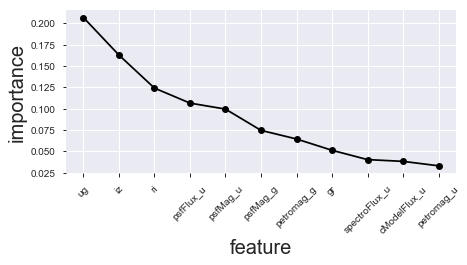

In [547]:
#importance
from pylab import * 
%pylab inline

importances = rfclf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
figure(figsize(7,3))
plot(importances[indices[:]],'ko-')
xticks( arange(len(X.columns)), X.columns[indices], rotation=45)
xlabel("feature",size=20)


ylabel("importance",size=20)

#### 5.2. XGB Classifier (Extreme Gradient Boosting (XGBOOST).

In [548]:
# First XGBoost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print(accuracy)


0.972727272727


### 6. Decision Trees  Classifier

In [682]:
from sklearn import tree

In [683]:
# Now, split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1)

# Create a decision tree classifier instance (start out with a small tree for interpretability)
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# Fit the decision tree classifier
ctree.fit(X_train, y_train)
print(X)


# Create a feature vector
features = X.columns.tolist()

features


      psfMag_u  psfMag_g   psfFlux_u  cModelFlux_u  spectroFlux_u  petromag_u  \
0     19.08621  17.41779   23.200550    187.181200      39.814580    17.12867   
1     22.34321  20.31663    1.138389      4.226673       2.123277    20.79233   
2     20.02440  19.60159    9.775770     10.600220      10.569600    19.93402   
3     20.89120  19.14573    4.396240     13.503720      10.502770    19.72187   
4     20.95082  19.93240    4.160846     17.216380       8.867897    19.50893   
5     22.67850  20.57042    0.825292     14.462910       4.219461    19.89724   
6     24.22017  21.98278    0.109514     -0.037106       0.658532    25.79026   
7     23.21058  21.36191    0.482007      7.354566       0.803794    22.40671   
8     21.02006  19.20854    3.903176     10.574250       8.969589    19.89400   
9     21.20904  19.42839    3.277897      7.857462       4.701622    20.49234   
10    19.40501  18.10427   17.296910     16.671450      40.157550    19.54561   
11    22.30211  20.24164    

['psfMag_u',
 'psfMag_g',
 'psfFlux_u',
 'cModelFlux_u',
 'spectroFlux_u',
 'petromag_u',
 'petromag_g',
 'gr',
 'iz',
 'ri',
 'ug']

In [684]:
# How to interpret the diagram?
ctree.classes_

array([0, 1, 2])

In [685]:
#X_train

In [686]:
# Predict what will happen for the given datapoint
 #features_
print(ctree.predict_proba(np.array([19.08621,17.41779 ,23.200550 ,187.181200, 39.814580, 17.12867, 15.61450 , 0.82198 , 0.35420 , 0.56084 , 1.66842 ]).reshape(1, -1)))
print(ctree.predict(np.array([19.08621,17.41779 ,23.200550 ,187.181200, 39.814580, 17.12867, 15.61450 , 0.82198 , 0.35420 , 0.56084 , 1.66842 ]).reshape(1, -1)))

[[ 0.01122895  0.95570805  0.03306301]]
[1]


In [687]:
from io import StringIO
out = StringIO()
tree.export_graphviz(ctree, out_file = out)
out.getvalue()

'digraph Tree {\nnode [shape=box] ;\n0 [label="X[10] <= 0.5429\\ngini = 0.2738\\nsamples = 3749\\nvalue = [261, 3168, 320]"] ;\n1 [label="X[9] <= -0.1461\\ngini = 0.3291\\nsamples = 270\\nvalue = [218, 30, 22]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.4861\\nsamples = 24\\nvalue = [2, 6, 16]"] ;\n1 -> 2 ;\n3 [label="gini = 0.2189\\nsamples = 246\\nvalue = [216, 24, 6]"] ;\n1 -> 3 ;\n4 [label="X[8] <= 0.1135\\ngini = 0.1789\\nsamples = 3479\\nvalue = [43, 3138, 298]"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="gini = 0.4312\\nsamples = 273\\nvalue = [7, 74, 192]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0854\\nsamples = 3206\\nvalue = [36, 3064, 106]"] ;\n4 -> 6 ;\n}'

In [688]:
from sklearn.tree import export_graphviz
export_graphviz(ctree, out_file='celestial.dot', feature_names=features)

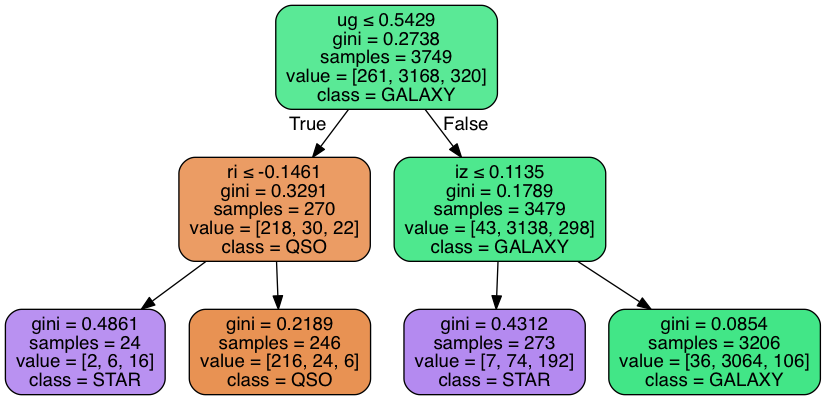

In [689]:
from IPython.display import Image
import pydotplus
# make sure pydot and graphviz are installed 
# if problems see here:
# http://stackoverflow.com/questions/15951748/pydot-and-graphviz-error-couldnt-import-dot-parser-loading-of-dot-files-will/17902926#17902926

dot_data = StringIO()  
tree.export_graphviz(
    ctree, 
    out_file=dot_data,
    feature_names=features,  
    class_names=["QSO","GALAXY", 'STAR'],  
    filled=True, 
    rounded=True,  
    special_characters=True
)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

#'STAR': '2', 'GALAXY': '1', 'QSO': '0

# if the above doesn't work, open command prompt, execut command: 



In [702]:


print(__doc__)

import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp



# Binarize the output
ytree = label_binarize(y, classes=[0, 1, 2])
n_classes = ytree.shape[1]

print(ytree.shape)

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, ytree, test_size=.3,
                                                    random_state=0)

# Learn to predict each class against the other

# Create a decision tree classifier instance (start out with a small tree for interpretability)
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
#classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,))
y_score = ctree.fit(X_train, y_train).predict(X_test)#.decision_function(X_test)
#https://stackoverflow.com/questions/45376410/how-to-get-roc-curve-for-decision-tree
#print(y_score)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])



FINE-TUNING THE TREE


(4999, 3)


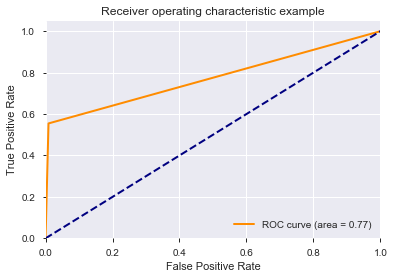

In [703]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

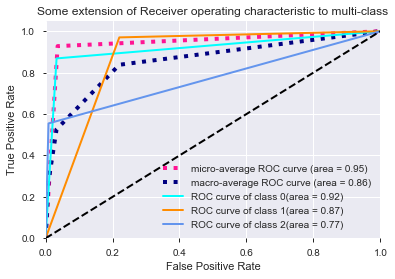

(4999,)


In [704]:
#### Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0}(area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
print(y.shape)

In [709]:
# Which features are the most important?
print("Feature importance: \n{}".format(ctree.feature_importances_))

# Clean up the output
#E: pd.DataFrame(zip(features, ctree.feature_importances_)).sort_index(by=1, ascending=False)

# Make predictions on the test set
preds = ctree.predict(X_test)

# Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(y_test, preds)))

# Confusion matrix
#print("\nConfusion matrix: \n{}".format(pd.crosstab(y_test, preds, rownames=['actual'], colnames=['predicted'])))

#print(metrics.confusion_matrix(y_test, ytree))

# Make predictions on the test set using predict_proba
#probs = ctree.predict_proba(X_test)#[:,1]

# Calculate the AUC metric

#roc += roc_auc_score(test_class, predictions_proba[:,1], average="weighted")
from sklearn.metrics import roc_auc_score
#print("\nAUC: \n{}".format(metrics.roc_auc_score(y_test, probs)))

Feature importance: 
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.56572737  0.          0.43427263]

Accuracy score: 
0.928


In [679]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

from sklearn.model_selection import cross_val_score

# compare AUC using cross-validation
#print("AUC for logistic regression: \n{}".format(cross_val_score(logreg, X, ybinary, cv=10, scoring='roc_auc').mean()))
print("\nAUC for decision tree: \n{}".format(cross_val_score(ctree, X,ytree, cv=10, scoring='roc_auc').mean()))

# so far logistic regression is winning..

'''

FINE-TUNING THE TREE

'''
from sklearn.grid_search import GridSearchCV

# check CV score for max depth = 3
ctree = tree.DecisionTreeClassifier(max_depth=3)
print("\nAUC for decision tree with max depth = 3: \n{}".format(np.mean(cross_val_score(ctree, X,ytree, cv=5, scoring='roc_auc'))))
print(ytree.shape)
# check CV score for max depth = 10
ctree = tree.DecisionTreeClassifier(max_depth=10)
print("\nAUC for decision tree max depth = 10: \n{}".format(np.mean(cross_val_score(ctree, X,ytree, cv=5, scoring='roc_auc'))))



AUC for decision tree: 
0.8616592234243452

AUC for decision tree with max depth = 3: 
0.8809277996016119
(4999, 3)

AUC for decision tree max depth = 10: 
0.8737435906038256


In [680]:
# Conduct a grid search for the best tree depth
ctree = tree.DecisionTreeClassifier(random_state=1)
depth_range = range(1, 20)
param_grid = dict(max_depth=list(depth_range))
grid = GridSearchCV(ctree, param_grid, cv=5, scoring='roc_auc')
grid.fit(X,ytree)


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

/Users/hos/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:7: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
/Users/hos/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/hos/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


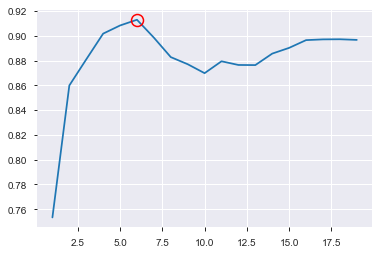

In [665]:
# Check out the scores of the grid search
grid_mean_scores = [result[1] for result in grid.grid_scores_]

# Plot the results of the grid search
plt.figure()
plt.plot(depth_range, grid_mean_scores)
plt.hold(True)
plt.grid(True)
plt.plot(grid.best_params_['max_depth'], grid.best_score_, 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')

In [66]:
'''

# Get the best estimator
best = grid.best_estimator_

cross_val_score(best, d, survived, cv=10, scoring='roc_auc').mean()
cross_val_score(logreg, d, survived, cv=10, scoring='roc_auc').mean()


# Still not as good as Logistic Regression.. 
# Let's try something else



### EXERCISE ###
 Use Grid Search try scan over three parameters
1. max_depth:     from 1 to 20
2. criterion:     (either 'gini' or 'entropy')
3. max_features : range (1,5)

'''

"\n\n# Get the best estimator\nbest = grid.best_estimator_\n\ncross_val_score(best, d, survived, cv=10, scoring='roc_auc').mean()\ncross_val_score(logreg, d, survived, cv=10, scoring='roc_auc').mean()\n\n\n# Still not as good as Logistic Regression.. \n# Let's try something else\n\n\n\n### EXERCISE ###\n Use Grid Search try scan over three parameters\n1. max_depth:     from 1 to 20\n2. criterion:     (either 'gini' or 'entropy')\n3. max_features : range (1,5)\n\n"

## To evaluate the Random Forest classifier by bootstrap sampling

In [782]:
import numpy as np
#len(vehicles.type)

from sklearn.dummy import DummyClassifier
# convert galaxy  to 1 and qso to 0 and star to 2

#datarawreduc['clas'] = datarawreduc.clas.map({'QSO':0, 'GALAXY':1, 'STAR':2})
#datarawreduc = datarawreduc.replace({'clas': {'STAR': '2', 'GALAXY': '1', 'QSO': '0'}})
#datarawreduc['clas'] = (datarawreduc['clas']).astype(int)



# print out data
datarawreduc



,psfMag_u,psfMag_g,psfFlux_u,cModelFlux_u,spectroFlux_u,petromag_u,petromag_g,gr,iz,ri,ug,clas
0,19.08621,17.41779,23.200550,187.181200,39.814580,17.12867,15.61450,0.82198,0.35420,0.56084,1.66842,1
1,22.34321,20.31663,1.138389,4.226673,2.123277,20.79233,19.23255,1.38291,0.38411,0.56115,2.02658,1
2,20.02440,19.60159,9.775770,10.600220,10.569600,19.93402,19.55049,0.10869,0.07359,0.12102,0.42281,0
3,20.89120,19.14573,4.396240,13.503720,10.502770,19.72187,17.70800,0.98700,0.38503,0.43951,1.74547,1
4,20.95082,19.93240,4.160846,17.216380,8.867897,19.50893,18.38805,0.34300,0.11411,0.44339,1.01842,1
5,22.67850,20.57042,0.825292,14.462910,4.219461,19.89724,18.66516,1.40566,0.43278,0.41953,2.10808,1
6,24.22017,21.98278,0.109514,-0.037106,0.658532,25.79026,21.34879,1.71869,0.53411,0.78428,2.23739,1
7,23.21058,21.36191,0.482007,7.354566,0.803794,22.40671,20.32166,1.75718,0.39789,0.66344,1.84867,1
8,21.02006,19.20854,3.903176,10.574250,8.969589,19.89400,17.99846,1.13827,0.45023,0.42316,1.81152,1
9,21.20904,19.42839,3.277897,7.857462,4.701622,20.49234,18.58341,0.89009,0.30022,0.37000,1.78065,1


In [783]:
n_rows = datarawreduc.shape[0]
#n_rows = X.shape[0]



# set a seed for reproducibility
np.random.seed(123)

# create three bootstrap samples (indices that will be used to select rows from the DataFrame)
sample1 = np.random.choice(a=n_rows, size=n_rows, replace=True)
sample2 = np.random.choice(a=n_rows, size=n_rows, replace=True)
sample3 = np.random.choice(a=n_rows, size=n_rows, replace=True)
print(sample1)
print(sample2)
print(sample3)

[3582 3454 1346 ...,  881 4375 4801]
[3772 2409 3823 ...,  334 1114 2998]
[ 791 3648 2132 ..., 2402 1696  539]


In [784]:
datarawreduc.iloc[sample1, 1:]

,psfMag_g,psfFlux_u,cModelFlux_u,spectroFlux_u,petromag_u,petromag_g,gr,iz,ri,ug,clas
3583,19.94860,2.695095,7.795184,7.244883,20.27104,18.60402,1.00805,0.32049,0.54002,1.47205,1
3455,18.84534,5.194926,32.889490,14.211940,18.82600,17.30108,0.71043,0.36554,0.33695,1.86492,1
1346,18.73958,4.914031,10.942400,11.714310,20.04894,18.10907,0.92120,0.40154,0.44266,2.03094,1
4061,19.17767,3.594115,7.463095,7.961739,20.37128,18.61032,0.99626,0.31945,0.46338,1.93171,1
1593,20.44580,1.130623,9.610099,4.368093,20.68810,18.28386,0.77390,0.36107,0.53127,1.90463,1
96,16.69078,69.975440,69.001370,157.743000,17.95604,16.70048,-0.12611,-0.07241,-0.11902,1.19685,2
4144,20.93122,1.043649,23.483060,2.698054,19.90866,18.78769,1.39233,0.56257,0.61059,1.50336,1
4170,20.63676,1.412040,10.689380,2.430079,20.38004,18.76003,1.24749,0.43174,0.54402,1.47810,1
942,18.61887,36.516410,36.237970,20.989990,18.63423,18.58337,0.10610,0.57436,-0.00957,-0.02511,0
111,20.31437,1.194023,1.999086,1.332104,21.81258,19.21505,1.21495,0.48560,0.62677,1.97847,1


In [763]:
from sklearn.dummy import DummyClassifier
# convert galaxy  to 1 and qso to 0 and star to 2

#datarawreduc['clas'] = datarawreduc.clas.map({'QSO':0, 'GALAXY':1, 'STAR':2})
# print out data
#datarawreduc

In [785]:
datarawreduc.iloc[sample1,1:]


,psfMag_g,psfFlux_u,cModelFlux_u,spectroFlux_u,petromag_u,petromag_g,gr,iz,ri,ug,clas
3583,19.94860,2.695095,7.795184,7.244883,20.27104,18.60402,1.00805,0.32049,0.54002,1.47205,1
3455,18.84534,5.194926,32.889490,14.211940,18.82600,17.30108,0.71043,0.36554,0.33695,1.86492,1
1346,18.73958,4.914031,10.942400,11.714310,20.04894,18.10907,0.92120,0.40154,0.44266,2.03094,1
4061,19.17767,3.594115,7.463095,7.961739,20.37128,18.61032,0.99626,0.31945,0.46338,1.93171,1
1593,20.44580,1.130623,9.610099,4.368093,20.68810,18.28386,0.77390,0.36107,0.53127,1.90463,1
96,16.69078,69.975440,69.001370,157.743000,17.95604,16.70048,-0.12611,-0.07241,-0.11902,1.19685,2
4144,20.93122,1.043649,23.483060,2.698054,19.90866,18.78769,1.39233,0.56257,0.61059,1.50336,1
4170,20.63676,1.412040,10.689380,2.430079,20.38004,18.76003,1.24749,0.43174,0.54402,1.47810,1
942,18.61887,36.516410,36.237970,20.989990,18.63423,18.58337,0.10610,0.57436,-0.00957,-0.02511,0
111,20.31437,1.194023,1.999086,1.332104,21.81258,19.21505,1.21495,0.48560,0.62677,1.97847,1


In [829]:
print(datarawreduc.iloc[sample1, 11])
#print(datarawreduc.iloc[sample1, :]['clas'])

3583    1
3455    1
1346    1
4061    1
1593    1
96      2
4144    1
4170    1
942     0
111     1
3482    2
1363    1
2895    1
3326    1
1092    1
1847    1
4548    1
2050    0
39      0
1346    1
1159    1
1897    1
4196    1
2429    1
3253    1
1382    1
3938    1
4310    1
3703    1
4959    1
       ..
3018    2
2360    1
4751    1
4231    1
982     1
1224    1
2837    0
2898    1
4562    1
3185    1
1470    2
837     1
3412    1
4455    1
4104    1
3782    1
3083    0
4016    2
3098    1
3096    1
3645    1
671     1
4489    1
3277    1
1741    1
500     1
4013    0
881     1
4376    1
4802    1
Name: clas, dtype: int64


In [830]:
from sklearn.tree import DecisionTreeRegressor

# grow one regression tree with each bootstrapped training set
treereg1 = DecisionTreeRegressor(random_state=123)
treereg1.fit(datarawreduc.iloc[sample1, 1:], datarawreduc.iloc[sample1, 11])

treereg2 = DecisionTreeRegressor(random_state=123)
treereg2.fit(datarawreduc.iloc[sample2, 1:], datarawreduc.iloc[sample2, 11])

treereg3 = DecisionTreeRegressor(random_state=123)
treereg3.fit(datarawreduc.iloc[sample3, 1:], datarawreduc.iloc[sample3, 11])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=123,
           splitter='best')

In [831]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [832]:
# read out-of-sample data:
#feature1_cols = ['psfMag_g', 'psfFlux_u', 'cModelFlux_u', 'spectroFlux_u', 'petromag_u','petromag_g','class']


ooraw = pd.read_csv('CELOBJ5000test.csv')
#ooraw.rename(columns={'class':'clas'}, inplace=True)
# convert objects to numbers:


ooraw['clas'] = ooraw.clas.map({'QSO':0, 'GALAXY':1, 'STAR':2})

ooraw["ug"] = ooraw.psfMag_u - ooraw.psfMag_g
ooraw["gr"] = ooraw.psfMag_g - ooraw.psfMag_r
ooraw["ri"] = ooraw.psfMag_r - ooraw.psfMag_i
ooraw["iz"] = ooraw.psfMag_i - ooraw.psfMag_z

oos=ooraw[['psfMag_g', 'psfFlux_u', 'cModelFlux_u', 'spectroFlux_u', 'petromag_u','petromag_g','ug','gr','ri','iz','clas']]

print(oos)
#oos

    psfMag_g   psfFlux_u  cModelFlux_u  spectroFlux_u  petromag_u  petromag_g  \
0   17.41779   23.200550    187.181200      39.814580    17.12867    15.61450   
1   20.31663    1.138389      4.226673       2.123277    20.79233    19.23255   
2   19.60159    9.775770     10.600220      10.569600    19.93402    19.55049   
3   19.14573    4.396240     13.503720      10.502770    19.72187    17.70800   
4   19.93240    4.160846     17.216380       8.867897    19.50893    18.38805   
5   20.57042    0.825292     14.462910       4.219461    19.89724    18.66516   
6   21.98278    0.109514     -0.037106       0.658532    25.79026    21.34879   
7   21.36191    0.482007      7.354566       0.803794    22.40671    20.32166   
8   19.20854    3.903176     10.574250       8.969589    19.89400    17.99846   
9   19.42839    3.277897      7.857462       4.701622    20.49234    18.58341   
10  18.10427   17.296910     16.671450      40.157550    19.54561    18.08947   
11  20.24164    1.183595    

In [833]:
feature_cols = datarawreduc.columns[1:]
feature_cols

Index(['psfMag_g', 'psfFlux_u', 'cModelFlux_u', 'spectroFlux_u', 'petromag_u',
       'petromag_g', 'gr', 'iz', 'ri', 'ug', 'clas'],
      dtype='object')

In [834]:
# select feature columns (every column except for the 0th column)
feature_cols = oos.columns[0:]

# make predictions on out-of-sample data
preds1 = treereg1.predict(oos[feature_cols])
preds2 = treereg2.predict(oos[feature_cols])
preds3 = treereg3.predict(oos[feature_cols])

# print predictions for Price from each model
print(preds1)
print(preds2)
print(preds3)

[ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  2.
  1.  1.  1.  2.  2.  1.  1.  1.  1.]
[ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  2.
  1.  1.  1.  2.  2.  1.  1.  1.  1.]
[ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  2.
  1.  1.  1.  2.  2.  1.  1.  1.  1.]


In [835]:
# average predictions and compare to actual values
print((preds1 + preds2 + preds3)/3)

[ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  2.  1.  1.  1.  1.  1.  1.  2.
  1.  1.  1.  2.  2.  1.  1.  1.  1.]


In [836]:
# The actual values
print(oos.psfMag_g.values)

[ 17.41779  20.31663  19.60159  19.14573  19.9324   20.57042  21.98278
  21.36191  19.20854  19.42839  18.10427  20.24164  19.28076  20.96365
  19.12126  21.01499  20.06321  16.51067  19.56912  20.24165  20.21695
  18.27849  20.06338  19.36397  21.94849  20.31439  18.49601]


In [837]:
# copy the oos dataframe
oos_pred = oos.copy()

# create a new predicted column
oos_pred['clas'] = (preds1 + preds2 + preds3)/3
oos_pred

,psfMag_g,psfFlux_u,cModelFlux_u,spectroFlux_u,petromag_u,petromag_g,ug,gr,ri,iz,clas
0,17.41779,23.200550,187.181200,39.814580,17.12867,15.61450,1.66842,0.82198,0.56084,0.35420,1.0
1,20.31663,1.138389,4.226673,2.123277,20.79233,19.23255,2.02658,1.38291,0.56115,0.38411,1.0
2,19.60159,9.775770,10.600220,10.569600,19.93402,19.55049,0.42281,0.10869,0.12102,0.07359,0.0
3,19.14573,4.396240,13.503720,10.502770,19.72187,17.70800,1.74547,0.98700,0.43951,0.38503,1.0
4,19.93240,4.160846,17.216380,8.867897,19.50893,18.38805,1.01842,0.34300,0.44339,0.11411,1.0
5,20.57042,0.825292,14.462910,4.219461,19.89724,18.66516,2.10808,1.40566,0.41953,0.43278,1.0
6,21.98278,0.109514,-0.037106,0.658532,25.79026,21.34879,2.23739,1.71869,0.78428,0.53411,1.0
7,21.36191,0.482007,7.354566,0.803794,22.40671,20.32166,1.84867,1.75718,0.66344,0.39789,1.0
8,19.20854,3.903176,10.574250,8.969589,19.89400,17.99846,1.81152,1.13827,0.42316,0.45023,1.0
9,19.42839,3.277897,7.857462,4.701622,20.49234,18.58341,1.78065,0.89009,0.37000,0.30022,1.0


In [838]:
# set is a data structure used to identify unique elements
print(set(range(10)))

# only show the unique elements in sample1
print(set(sample1))# these are for the car samples with 14 rows

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
{0, 1, 2, 3, 5, 7, 8, 13, 14, 16, 17, 18, 21, 22, 23, 25, 26, 27, 29, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 46, 47, 49, 50, 51, 52, 53, 54, 55, 56, 57, 60, 62, 64, 67, 69, 70, 71, 73, 75, 76, 77, 78, 82, 83, 86, 87, 88, 89, 90, 91, 92, 93, 94, 96, 99, 100, 105, 106, 107, 108, 109, 111, 113, 114, 117, 118, 119, 120, 121, 122, 123, 125, 126, 127, 130, 133, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 151, 153, 154, 157, 158, 161, 164, 166, 169, 170, 172, 173, 174, 175, 177, 178, 179, 180, 181, 182, 183, 184, 185, 189, 191, 194, 195, 196, 198, 199, 200, 201, 205, 206, 208, 210, 212, 214, 216, 217, 223, 227, 228, 230, 231, 232, 233, 234, 240, 241, 243, 245, 246, 247, 249, 250, 251, 253, 255, 256, 258, 259, 260, 261, 262, 266, 268, 269, 270, 271, 272, 273, 274, 275, 277, 278, 280, 281, 282, 283, 285, 286, 287, 291, 292, 293, 294, 295, 296, 297, 300, 301, 302, 303, 305, 306, 307, 308, 310, 311, 312, 313, 316, 318, 321, 323, 324, 325, 326, 

In [839]:
# use the "set difference" to identify the out-of-bag observations for each tree
print(sorted(set(range(10)) - set(sample1)))
print(sorted(set(range(10)) - set(sample2)))
print(sorted(set(range(10)) - set(sample3)))

[4, 6, 9]
[1, 5, 7]
[1, 4, 9]


In [840]:
# import class, instantiate estimator, fit with all data

rfclf = RandomForestClassifier(n_estimators=100, max_features='auto',oob_score=True, random_state=1)
rfclf.fit(X_train, y_train)
print(rfclf.score(X_test,y_test))
rfclf.oob_score_





0.974666666667


0.9804706106506621